In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-b2wse93k
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-b2wse93k
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ----------- CLIP: Zero-shot image classification -----------
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Download example image
image_url = "https://raw.githubusercontent.com/openai/CLIP/main/CLIP.png"
image_path = tf.keras.utils.get_file("clip_demo.png", origin=image_url)
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# Define candidate labels
text_labels = ["a diagram", "a dog", "a cat", "an image of CLIP"]
text = clip.tokenize(text_labels).to(device)

# Run the model
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# Print results
print("CLIP Label probabilities:", dict(zip(text_labels, probs[0])))

CLIP Label probabilities: {'a diagram': np.float16(0.724), 'a dog': np.float16(0.003101), 'a cat': np.float16(0.0022), 'an image of CLIP': np.float16(0.2705)}


In [ ]:
try:
    tf.config.set_visible_devices([], 'GPU')
    print("GPU devices hidden. Visible devices:", tf.config.get_visible_devices())
except Exception as e:
    print(f"Could not disable GPU, proceeding anyway: {e}")

Could not disable GPU, proceeding anyway: Visible devices cannot be modified after being initialized


In [ ]:
# --- FORCE CPU EXECUTION (FOR DIAGNOSTICS) ---
# Add this block to diagnose persistent GPU initialization errors.
# Remove or comment out this block to attempt GPU execution again later.
print("\n!!! WARNING: Forcing CPU execution to diagnose GPU issue !!!")
try:
    # Get list of GPUs, should be non-empty if GPU runtime is selected
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
            # Prevent TensorFlow from using the GPU
        tf.config.set_visible_devices([], 'GPU')
        print("GPU devices hidden.")
    else:
        print("No GPU devices found initially.")

    # Verify the visible devices now only include CPU
    visible_devices = tf.config.get_visible_devices()
    print("Visible devices:", visible_devices)
    is_cpu_only = all(device.device_type == 'CPU' for device in visible_devices)
    print(f"CPU-only execution enforced: {is_cpu_only}")

except Exception as e:
    print(f"Could not disable GPU, proceeding anyway: {e}")
print("------------------------------------------------------\n")
# --- END OF CPU FORCING BLOCK ---

In [ ]:
!pip install tensorflow==2.16.* tensorflow_hub==0.16.* # Pinning to TF 2.16 and compatible Hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled num

--- Setup ---
TensorFlow version: 2.16.2
TensorFlow Hub version: 0.16.1
GPU Available: []
Timestamp: Thu May  1 07:49:23 2025
-------------

Mixed precision enabled: mixed_float16
-----------------------------

--- Loading Dataset: cifar10 ---
Dataset loaded in 0.12 seconds.
Num training examples: 50000
Num test examples: 10000
Num classes: 10
---------------------------------

--- Defining Preprocessing ---
-----------------------------

--- Creating Data Pipelines ---
Pipelines created (with caching).
-----------------------------

--- Building Model ---
Loading ResNetV2-50 feature vector from TF Hub using hub.load: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5
Hub Module loaded in 1.29 seconds.
Defining model structure using Keras Functional API with Lambda Layer...


Model: "resnet_transfer_lambda_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_4 (Cast)                   │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_lambda_feature_extractor    │ (None, 2048)           │             0 │
│ (Lambda)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

----------------------

--- Compiling Model ---
Wrapping optimizer for mixed precision.
Model compiled.
-----------------------

--- Starting Training for 1 Epochs ---
Using Batch Size: 64
782/782 ━━━━━━━━━━━━━━━━━━━━ 784s 996ms/step - accuracy: 0.7782 - loss: 0.6612 - val_accuracy: 0.8708 - val_loss: 0.3713
Training finished in 784.15 seconds.
------------------------------------

--- Evaluating Model ---
Evaluation finished in 126.96 seconds.

Test Loss: 0.3713
Test Accuracy: 0.8708 (87.08%)
------------------------

--- Plotting Training History ---


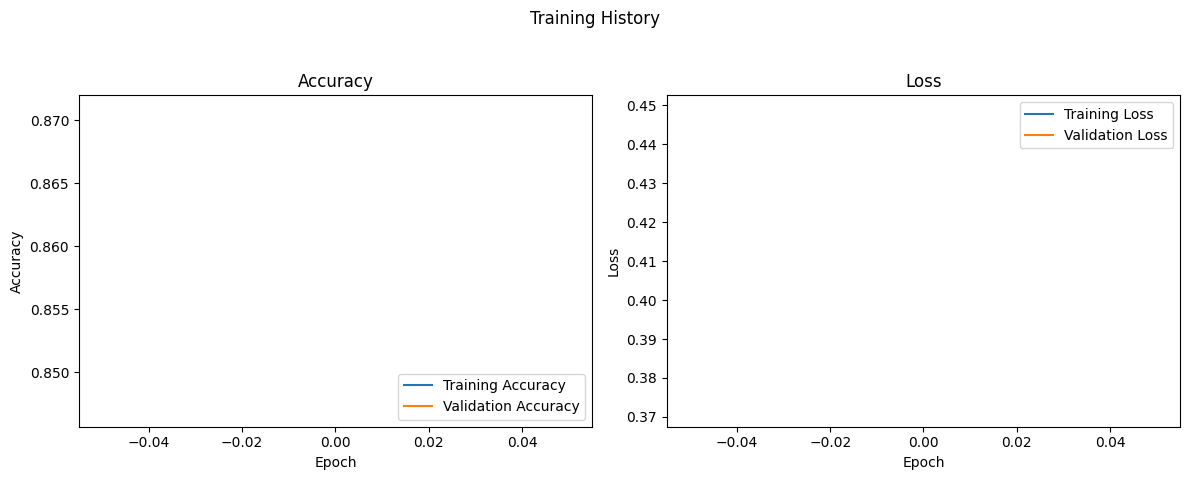

-------------------------------


--- End of Demonstration ---


In [ ]:
# -*- coding: utf-8 -*-
"""
Demonstrates Transfer Learning using a ResNetV2 50 model from TensorFlow Hub
on the CIFAR-10 dataset.

Final corrected version aiming for GPU execution with mixed precision,
caching, hub.load()+Lambda, output_shape fix, and tf.cast fix for dtype mismatch.
"""

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
import time # Import time for timestamp
from tensorflow.keras import mixed_precision # Import mixed precision

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("--- Setup ---")
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
# --- Ensure GPU is visible (CPU-forcing block is removed) ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU(s) available: {gpus}")
    # Optional: Configure memory growth if needed
    # try:
    #     for gpu in gpus:
    #         tf.config.experimental.set_memory_growth(gpu, True)
    #     print("GPU memory growth configured.")
    # except RuntimeError as e:
    #     print(f"Could not set memory growth: {e}")
else:
    print("WARNING: No GPU detected! Running on CPU will be very slow.")
print(f"Timestamp: {time.ctime()}")
print("-------------\n")


# --- Enable Mixed Precision (Optional, keep if GPU supports it) ---
try:
    policy = mixed_precision.Policy('mixed_float16')
    mixed_precision.set_global_policy(policy)
    print(f'Mixed precision enabled: {policy.name}')
    mixed_precision_enabled = True
except Exception as e:
    print(f"Could not enable mixed precision: {e}. Proceeding with float32.")
    mixed_precision_enabled = False
print("-----------------------------\n")


# --- 1. Constants and Configuration ---
# Dataset specific
DATASET_NAME = "cifar10"
NUM_CLASSES = 10 # CIFAR-10 has 10 classes

# Model specific (Using ResNetV2 50 Feature Vector)
IMAGE_SIZE = 224 # Both resize and final crop size for ResNetV2
MODEL_HANDLE = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5" # ResNetV2-50 Feature Vector

# Training parameters
BATCH_SIZE = 64 # Start with 32 for GPU, can try increasing later if memory allows
EPOCHS = 1      # Number of training epochs
LEARNING_RATE = 0.001 # A common starting LR for transfer learning


# --- 2. Load and Prepare the Dataset ---
print(f"--- Loading Dataset: {DATASET_NAME} ---")
start_time = time.time()
(ds_train, ds_test), ds_info = tfds.load(
    DATASET_NAME,
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True, # Returns tuple (img, label)
    with_info=True,
)
print(f"Dataset loaded in {time.time() - start_time:.2f} seconds.")
print(f"Num training examples: {ds_info.splits['train'].num_examples}")
print(f"Num test examples: {ds_info.splits['test'].num_examples}")
print(f"Num classes: {ds_info.features['label'].num_classes}")
print("---------------------------------\n")


# --- 3. Preprocessing Functions ---
print("--- Defining Preprocessing ---")
def preprocess_image(image, label, is_training):
    """Normalizes and resizes images to IMAGE_SIZE."""
    image = tf.image.convert_image_dtype(image, dtype=tf.float32) # Scale to [0,1], start as float32
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE]) # Resize to target size
    image = tf.ensure_shape(image, [IMAGE_SIZE, IMAGE_SIZE, 3])
    # Note: Keras Input layer might automatically cast to float16 if mixed precision is enabled
    return image, label
print("-----------------------------\n")


# --- 4. Create tf.data Pipelines ---
print("--- Creating Data Pipelines ---")
AUTOTUNE = tf.data.AUTOTUNE
pipeline_train = (
    ds_train
    .shuffle(ds_info.splits['train'].num_examples // 10)
    .map(lambda x, y: preprocess_image(x, y, is_training=True), num_parallel_calls=AUTOTUNE)
    .cache()  # Cache after mapping
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)
pipeline_test = (
    ds_test
    .map(lambda x, y: preprocess_image(x, y, is_training=False), num_parallel_calls=AUTOTUNE)
    .cache()  # Cache after mapping
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)
print("Pipelines created (with caching).")
print("-----------------------------\n")


# --- 5. Visualize a Batch (Optional) ---
# (Skipping visualization)


# --- 6. Build the Transfer Learning Model (using hub.load + Lambda Layer) ---
print(f"--- Building Model ---")
print(f"Loading ResNetV2-50 feature vector from TF Hub using hub.load: {MODEL_HANDLE}")
start_time = time.time()

# Load the TF Hub module directly using hub.load()
hub_module = hub.load(MODEL_HANDLE)
print(f"Hub Module loaded in {time.time() - start_time:.2f} seconds.")

# Define a function that uses the loaded module
def feature_extractor_fn(image_batch):
    # !!! Cast input to float32 inside the function !!!
    # This is needed because the hub module expects float32, but mixed precision
    # might cause the input `image_batch` tensor to be float16 here.
    image_batch_float32 = tf.cast(image_batch, tf.float32)
    return hub_module(image_batch_float32)

print("Defining model structure using Keras Functional API with Lambda Layer...")
# 1. Define the input layer
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='input_image') # dtype might be float16 due to policy

# 2. Wrap the hub module function call in a Lambda layer (with output_shape)
features = tf.keras.layers.Lambda(
    feature_extractor_fn,
    output_shape=(2048,), # Specify the expected output shape
    name='hub_lambda_feature_extractor'
)(inputs)

# 3. Add the classification head
# The Dense layer computes in float32 for precision and stability, as per mixed precision policy.
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='classification_head')(features)

# 4. Create the Model by specifying inputs and outputs
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='resnet_transfer_lambda_model')

model.summary()
print("----------------------\n")


# --- 7. Compile the Model ---
print("--- Compiling Model ---")
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Wrap optimizer ONLY if mixed precision was successfully enabled
if mixed_precision_enabled:
    print("Wrapping optimizer for mixed precision.")
    optimizer = mixed_precision.LossScaleOptimizer(optimizer)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
print("Model compiled.")
print("-----------------------\n")


# --- 8. Train the Model ---
print(f"--- Starting Training for {EPOCHS} Epochs ---")
print(f"Using Batch Size: {BATCH_SIZE}")
start_time = time.time()
history = model.fit(
    pipeline_train,
    epochs=EPOCHS,
    validation_data=pipeline_test,
    verbose=1
)
print(f"Training finished in {time.time() - start_time:.2f} seconds.")
print("------------------------------------\n")


# --- 9. Evaluate the Model ---
print("--- Evaluating Model ---")
start_time = time.time()
loss, accuracy = model.evaluate(pipeline_test, verbose=0)
print(f"Evaluation finished in {time.time() - start_time:.2f} seconds.")
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("------------------------\n")


# --- 10. Plot Training History (Optional) ---
print("--- Plotting Training History ---")
def plot_history(history):
    """Plots training & validation accuracy and loss."""
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    if not acc or not val_acc or not loss or not val_loss:
        print("Could not plot history: Missing keys in history object.")
        return

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.suptitle("Training History")
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right'); plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right'); plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()

try:
    plot_history(history)
except Exception as e:
    print(f"Could not plot history: {e}")
print("-------------------------------\n")


# --- 11. Make Predictions on a Few Test Images (Optional) ---
# (Skipping prediction visualization)


print("\n--- End of Demonstration ---")


# --- 12. Optional: Fine-tuning ---
# (Fine-tuning section omitted)

--- Plotting Training History ---


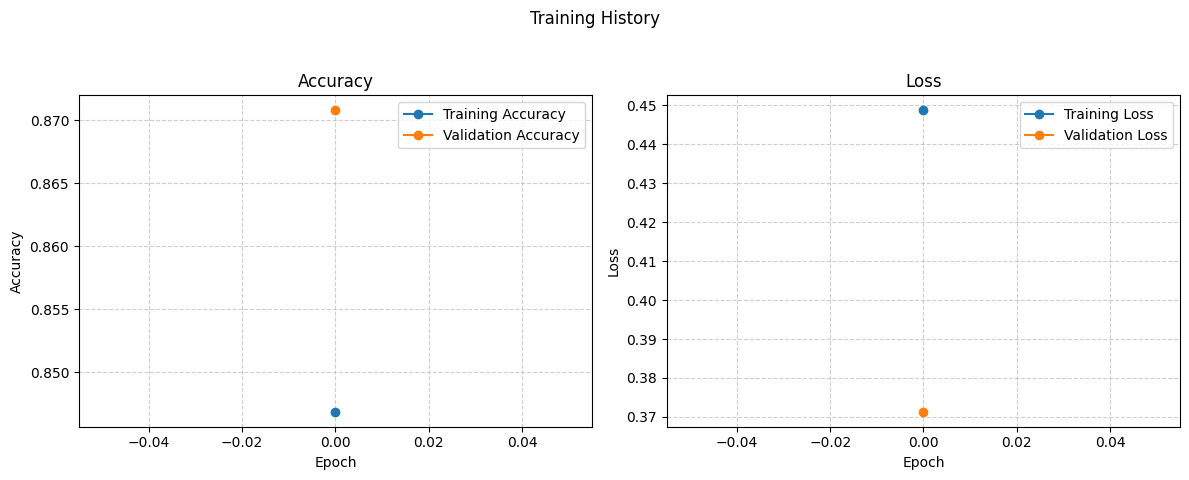

-------------------------------



In [ ]:
import matplotlib.pyplot as plt

# --- Plotting Training History ---
print("--- Plotting Training History ---")

def plot_history(history):
    """Plots training & validation accuracy and loss."""
    # Use .get() to safely access keys, providing an empty list if the key doesn't exist
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    # Check if any essential data is missing or empty
    if not acc or not val_acc or not loss or not val_loss:
        print("Could not plot history: Missing or empty data for 'accuracy', 'val_accuracy', 'loss', or 'val_loss' keys in history object.")
        print(f"History keys available: {list(history.history.keys())}")
        return

    # Determine the number of epochs actually completed
    epochs_range = range(len(acc))
    if not epochs_range:
         print("Could not plot history: No epoch data found (e.g., accuracy list is empty).")
         return


    plt.figure(figsize=(12, 5))
    plt.suptitle("Training History")

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'o-', label='Training Accuracy') # Added markers
    plt.plot(epochs_range, val_acc, 'o-', label='Validation Accuracy') # Added markers
    plt.legend(loc='best') # Use 'best' location
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # Add grid for readability
    plt.grid(True, linestyle='--', alpha=0.6)


    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'o-', label='Training Loss') # Added markers
    plt.plot(epochs_range, val_loss, 'o-', label='Validation Loss') # Added markers
    plt.legend(loc='best') # Use 'best' location
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # Add grid for readability
    plt.grid(True, linestyle='--', alpha=0.6)


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# --- Call the function ---
# Make sure the 'history' variable holds the result from your model.fit() call
try:
    if 'history' in locals() or 'history' in globals():
        plot_history(history)
    else:
        print("Variable 'history' not found. Make sure model.fit() has been run and its result stored in 'history'.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")
    # Optionally print the history object content for debugging
    # if 'history' in locals() or 'history' in globals():
    #    print("History object contents:", history.history)

print("-------------------------------\n")